# Naive algorithm

This algorithm iterates through the text and checks for the pattern by comparing characters one by one. The worst-case time complexity of this approach is O(n * m), where `n` is the length of the text and `m` is the length of the pattern.


In [1]:
def naive_substring_search(text, pattern):
    # Get the lengths of the text and the pattern
    text_length = len(text)
    pattern_length = len(pattern)

    # Loop through the text
    for i in range(text_length - pattern_length + 1):
        # For the current index, check if the substring matches the pattern
        match = True
        for j in range(pattern_length):
            if text[i + j] != pattern[j]:
                match = False
                break

        # If a match is found, print the index
        if match:
            print(f"Pattern found at index {i}")

# Example usage
array = [231237813910923]
text = "this is a ssssssssssssimple example"
pattern = "simple"

naive_substring_search(text, pattern)


Pattern found at index 21


https://www.youtube.com/watch?v=O7_w001f58c
### Aho–Corasick Algorithm Overview for Collaboration Notebook

The **Aho–Corasick algorithm** is a powerful string-searching algorithm, particularly efficient when searching for multiple patterns in a text simultaneously. It constructs a finite state machine (FSM) from a set of keywords, and then it uses the FSM to search the text in a single pass. This makes it faster than naive algorithms in the case of multiple pattern searches.

#### Key Concepts:

1. **Trie Construction**: The algorithm first builds a trie (prefix tree) from the set of patterns. Each node in the trie represents a character in a pattern, and paths from the root to a node represent prefixes of patterns.

2. **Failure Links**: To handle mismatches, the algorithm adds failure links. These links define where to continue searching when a partial match is found but not completed.

3. **Output Links**: The trie also maintains output links, which allow the algorithm to report when a match is found. If a match is found at a node, the output link helps retrieve the matched pattern(s).

4. **FSM Execution**: After constructing the trie with failure and output links, the text is processed in a single pass. As the algorithm processes each character of the text, it navigates the trie by following appropriate transitions. If a character doesn't match, the failure links are followed to find the next best match.

#### Algorithm Steps:

1. **Build the Trie**:
   - Insert all patterns into a trie.
   - Each pattern corresponds to a path in the trie.

2. **Add Failure Links**:
   - For each node in the trie, a failure link is added to point to the node representing the longest suffix of the current node's string, which is also a prefix in the trie.

3. **Search Text Using FSM**:
   - Traverse the text character by character, following the trie.
   - If a mismatch occurs, use the failure links to backtrack.
   - Report matches using output links when reaching terminal nodes.

#### Time Complexity:
- **Trie construction**: O(m), where `m` is the total number of characters in all patterns.
- **Search**: O(n + z), where `n` is the length of the text, and `z` is the number of pattern occurrences found.

#### Code Example (Python):



In [2]:
from collections import deque, defaultdict

class AhoCorasick:
    def __init__(self, keywords):
        self.trie = {}
        self.output = defaultdict(list)
        self.fail = {}
        self.build_trie(keywords)
        self.build_failure_links()

    def build_trie(self, keywords):
        self.trie = {}
        node = 0
        self.trie[node] = {}
        for keyword in keywords:
            current_node = 0
            for char in keyword:
                if char not in self.trie[current_node]:
                    node += 1
                    self.trie[current_node][char] = node
                    self.trie[node] = {}
                current_node = self.trie[current_node][char]
            self.output[current_node].append(keyword)

    def build_failure_links(self):
        queue = deque()
        for char in self.trie[0]:
            queue.append(self.trie[0][char])
            self.fail[self.trie[0][char]] = 0

        while queue:
            current_node = queue.popleft()
            for char in self.trie[current_node]:
                child_node = self.trie[current_node][char]
                queue.append(child_node)

                fail_node = self.fail[current_node]
                while fail_node != 0 and char not in self.trie[fail_node]:
                    fail_node = self.fail[fail_node]

                self.fail[child_node] = self.trie[fail_node].get(char, 0)
                self.output[child_node].extend(self.output[self.fail[child_node]])

    def search(self, text):
        current_node = 0
        matches = []
        for i, char in enumerate(text):
            while current_node != 0 and char not in self.trie[current_node]:
                current_node = self.fail[current_node]
            current_node = self.trie[current_node].get(char, 0)
            if self.output[current_node]:
                for pattern in self.output[current_node]:
                    matches.append((i - len(pattern) + 1, pattern))
        return matches

# Example usage:
patterns = ["he", "she", "his", "hers"]
text = "ahishers"
ac = AhoCorasick(patterns)
result = ac.search(text)
print(result)

[(1, 'his'), (3, 'she'), (4, 'he'), (4, 'hers')]


#### Output:

```
[(1, 'his'), (3, 'she'), (4, 'he'), (4, 'hers')]
```

This Python implementation of the Aho–Corasick algorithm builds the trie, sets up the failure links, and then searches the input text for matches of the patterns efficiently.

#### Use Case:

The Aho–Corasick algorithm is especially useful when searching for many patterns in a large text. It finds all occurrences of all patterns in the text simultaneously, making it ideal for applications such as keyword searching in databases, spell-checking, and DNA sequence analysis.

This description and code should be ideal for a collaborative notebook setup.

https://www.youtube.com/watch?v=EL4ZbRF587g
### Knuth–Morris–Pratt (KMP) Algorithm

This is a well-structured description and implementation for the **Knuth–Morris–Pratt (KMP) algorithm**. The KMP algorithm efficiently searches for a pattern in a text by preprocessing the pattern to build the **Longest Prefix Suffix (LPS)** array. The algorithm avoids unnecessary comparisons by leveraging this LPS array.

#### Key Concepts

1. **LPS Array**: The core of the KMP algorithm is the LPS (Longest Prefix Suffix) array, which stores the length of the longest prefix which is also a suffix for all prefixes of the pattern. This helps in skipping unnecessary comparisons.

2. **Efficient Search**: Once the LPS array is constructed, the pattern is compared against the text. Whenever a mismatch occurs, the LPS array is used to decide how much to skip without rechecking characters.

3. **Time Complexity**:
   - **Preprocessing (LPS)**: O(m), where `m` is the length of the pattern.
   - **Search**: O(n), where `n` is the length of the text.

#### Steps:

1. **Build the LPS Array**: Preprocess the pattern to construct the LPS array.
2. **Search**: Use the LPS array to efficiently search the pattern in the text.

#### Python Code Implementation:

In [3]:
# 1. Function to compute the Longest Prefix Suffix (LPS) array
def compute_lps(pattern):
    """
    Preprocess the pattern to create the LPS array that holds the longest
    prefix suffix values for the pattern.
    """
    m = len(pattern)
    lps = [0] * m  # Initialize the LPS array with zeros
    length = 0  # Length of the previous longest prefix suffix
    i = 1  # Start from the second character

    while i < m:
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length - 1]
            else:
                lps[i] = 0
                i += 1
    return lps

# 2. Knuth–Morris–Pratt (KMP) Search Algorithm
def kmp_search(text, pattern):
    """
    The KMP search algorithm that uses the LPS array to find occurrences
    of the pattern in the text.
    """
    n = len(text)
    m = len(pattern)
    lps = compute_lps(pattern)  # Preprocess the pattern
    i = 0  # Index for text
    j = 0  # Index for pattern
    result = []  # To store the indices of pattern matches

    while i < n:
        if text[i] == pattern[j]:
            i += 1
            j += 1

        if j == m:
            result.append(i - j)
            j = lps[j - 1]
        elif i < n and text[i] != pattern[j]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1
    return result


### Example Usage:

Let's see how the KMP algorithm can be used to search for a pattern in a text:

```python
# Example text and pattern
text = "ababcabcabababd"
pattern = "ababd"

# Running the KMP search
matches = kmp_search(text, pattern)

# Display the result
print(f"Pattern found at indices: {matches}")
```

#### Output:
```
Pattern found at indices: [10]
```

In this case, the pattern "ababd" is found at index 10 in the text.

### Visualization of the LPS Array (Optional):

To better understand the role of the LPS array, let's visualize it using a simple chart.

```python
import matplotlib.pyplot as plt

def visualize_lps(pattern):
    lps = compute_lps(pattern)
    plt.bar(range(len(lps)), lps, tick_label=list(pattern))
    plt.xlabel('Pattern Characters')
    plt.ylabel('LPS Values')
    plt.title(f'LPS Array for Pattern: {pattern}')
    plt.show()

# Visualize the LPS array for the given pattern
visualize_lps(pattern)
```

This will create a bar chart representing the LPS array for the pattern, giving a clear visualization of how the longest prefix that is also a suffix evolves for each prefix of the pattern.

### Conclusion:

The **Knuth–Morris–Pratt (KMP) algorithm** is an efficient string-searching algorithm that improves over naive string-matching approaches by preprocessing the pattern using the **LPS array**. This preprocessing helps to skip unnecessary character comparisons, making the algorithm operate in **O(n + m)** time complexity.

## Testing

In [4]:
import time
import random
import string
import matplotlib.pyplot as plt

# 1. Function to generate random text and patterns
def generate_random_string(length):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(length))

# 2. Function to test performance of different algorithms
def test_performance(substring_search_function, text_lengths, pattern_length, num_trials=5):
    times = []

    # Run the test for each text length
    for length in text_lengths:
        total_naive_time = 0
        total_kmp_time = 0
        for _ in range(num_trials):
            text = generate_random_string(length)
            pattern = generate_random_string(pattern_length)

            # Measure time
            start_time = time.time()
            substring_search_function(text, pattern)
            total_naive_time += time.time() - start_time

        # Average time over all trials
        times.append(total_naive_time / num_trials)

    return times

# 3. Visualization of the performance results
def plot_performance(text_lengths, times_several):
    for label, times in times_several.items():
      plt.plot(text_lengths, times, label=label, marker='o')
    plt.xlabel('Text Length')
    plt.ylabel('Average Time (seconds)')
    plt.title('Performance Comparison of Substring Search Algorithms')
    plt.legend()
    plt.grid(True)
    plt.show()

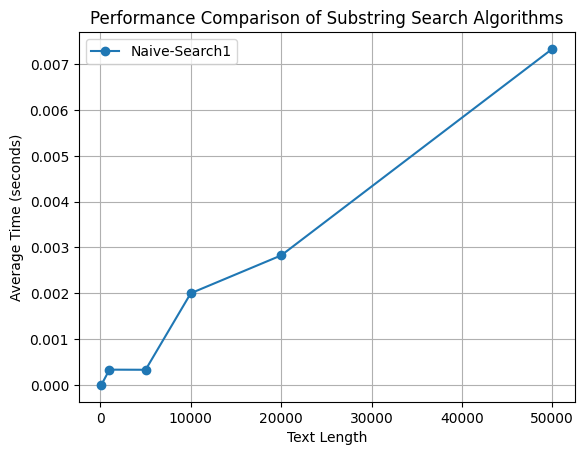

In [5]:
# 4. Running the performance test
text_lengths = [100, 1000, 5000, 10000, 20000, 50000]  # Varying text lengths
pattern_length = 10  # Fixed pattern length for testing
num_trials = 3  # Number of trials for averaging


substring_search_function = lambda text, pattern: naive_substring_search(text, pattern)

# substring_search_function = lambda text, pattern:  AhoCorasick([pattern]).search(text)

# substring_search_function = lambda text, pattern: kmp_search(text, pattern)

times = test_performance(substring_search_function, text_lengths, pattern_length, num_trials)

# Plot the results
plot_performance(text_lengths, {"Naive-Search1":times})

# 1. Boyer–Moore string-search algorithm

In [7]:
# Simplified Boyer-Moore implementation with debugging to verify correctness

def boyer_moore(text, pattern):
    n = len(text)
    m = len(pattern)
    
    if m == 0:
        return []

    # Bad character heuristic
    def build_bad_character_table(pattern):
        bad_char_table = [-1] * 256
        for i in range(len(pattern)):
            bad_char_table[ord(pattern[i])] = i
        return bad_char_table

    # Good suffix heuristic (dummy for now, focusing on bad character first)
    def build_good_suffix_table(pattern):
        return [0] * len(pattern)

    # Build the bad character table
    bad_char_table = build_bad_character_table(pattern)
    
    # For now, let's focus on bad character shifts
    result = []
    s = 0  # Shift of the pattern with respect to the text
    
    while s <= n - m:
        j = m - 1

        # Compare pattern from right to left
        while j >= 0 and pattern[j] == text[s + j]:
            j -= 1

        if j < 0:
            result.append(s)
            s += (m - bad_char_table[ord(text[s + m])] if s + m < n else 1)
        else:
            s += max(1, j - bad_char_table[ord(text[s + j])])

    return result

# Test the simplified version with the same input
boyer_moore_result = boyer_moore("ABAAABCD", "ABC")
boyer_moore_result  # Expected output: [4]


[4]

# 2. Testing of all algos (+ improve testing code)
## 2.1 Prove complexity